In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()
import matplotlib.font_manager
from matplotlib.pyplot import figure
import matplotlib.patches as patches
figure(num=None, figsize=(5, 5), dpi=100)
sns.set_context("paper", rc={'axes.labelsize': 57.6,
 'axes.titlesize': 57.2,
 'font.size': 48.2,
 'grid.linewidth': 1.6,
 'legend.fontsize': 16.0,
 'lines.linewidth': 2.8,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 11.2,
 'patch.linewidth': 0.48,
 'xtick.labelsize': 32.0,
 'xtick.major.pad': 11.2,
 'xtick.major.width': 1.6,
 'xtick.minor.width': 0.8,
 'ytick.labelsize': 48.0,
 'ytick.major.pad': 11.2,
 'ytick.major.width': 1.6,
 'ytick.minor.width': 0.8}) 

sns.set_style('darkgrid')
font = {'weight' : 'bold', "size":12}
matplotlib.rc('font', **font)

<Figure size 500x500 with 0 Axes>

In [2]:
import numpy as np
import pandas as pd

def load_bound_log(filename):
    with open(filename) as f:
        content = f.readlines()
    content = [x.strip() for x in content] 
    eps = []; ps = []; inds = []
    for i in content:
        arr = i.split('_')
        #print(arr)
        inds.append(int(arr[1]))
        ps.append(float(arr[-1])); eps.append(float(arr[-3]))
        #gap.append(float(arr[-1]) - float(arr[-3]))
    return eps, ps, inds
#datasets = ['kin8nm', 'naval', 'wine', 'boston', 'concrete', 'powerplant', 'yacht', 'energy']
datasets = ['boston', 'concrete', 'energy']
label = []; e = []; p = []; ind = []
for d in datasets:
    #eps, ps = load_bound_log('MURLogs/%s1_eps.log'%(d))
    eps, ps, inds = load_bound_log('MURLogs/%s1_upper_eps.log'%(d))
    for i in range(len(eps)):
        label.append(d); e.append(eps[i]); p.append(ps[i]);
        
dataupper = pd.DataFrame({'label':label, 'eps':e, 'ps':p})

In [3]:
datasets = ['boston', 'concrete', 'energy']
label = []; e = []; p = []
for d in datasets:
    eps, ps, inds = load_bound_log('MSELogs/%s1_eps.log'%(d))
    for i in range(len(eps)):
        label.append(d); e.append(eps[i]); p.append(ps[i])
        
datalower = pd.DataFrame({'label':label, 'eps':e, 'ps':p})

Text(0.5, 1.0, 'Verifiying Regression Benchmarks')

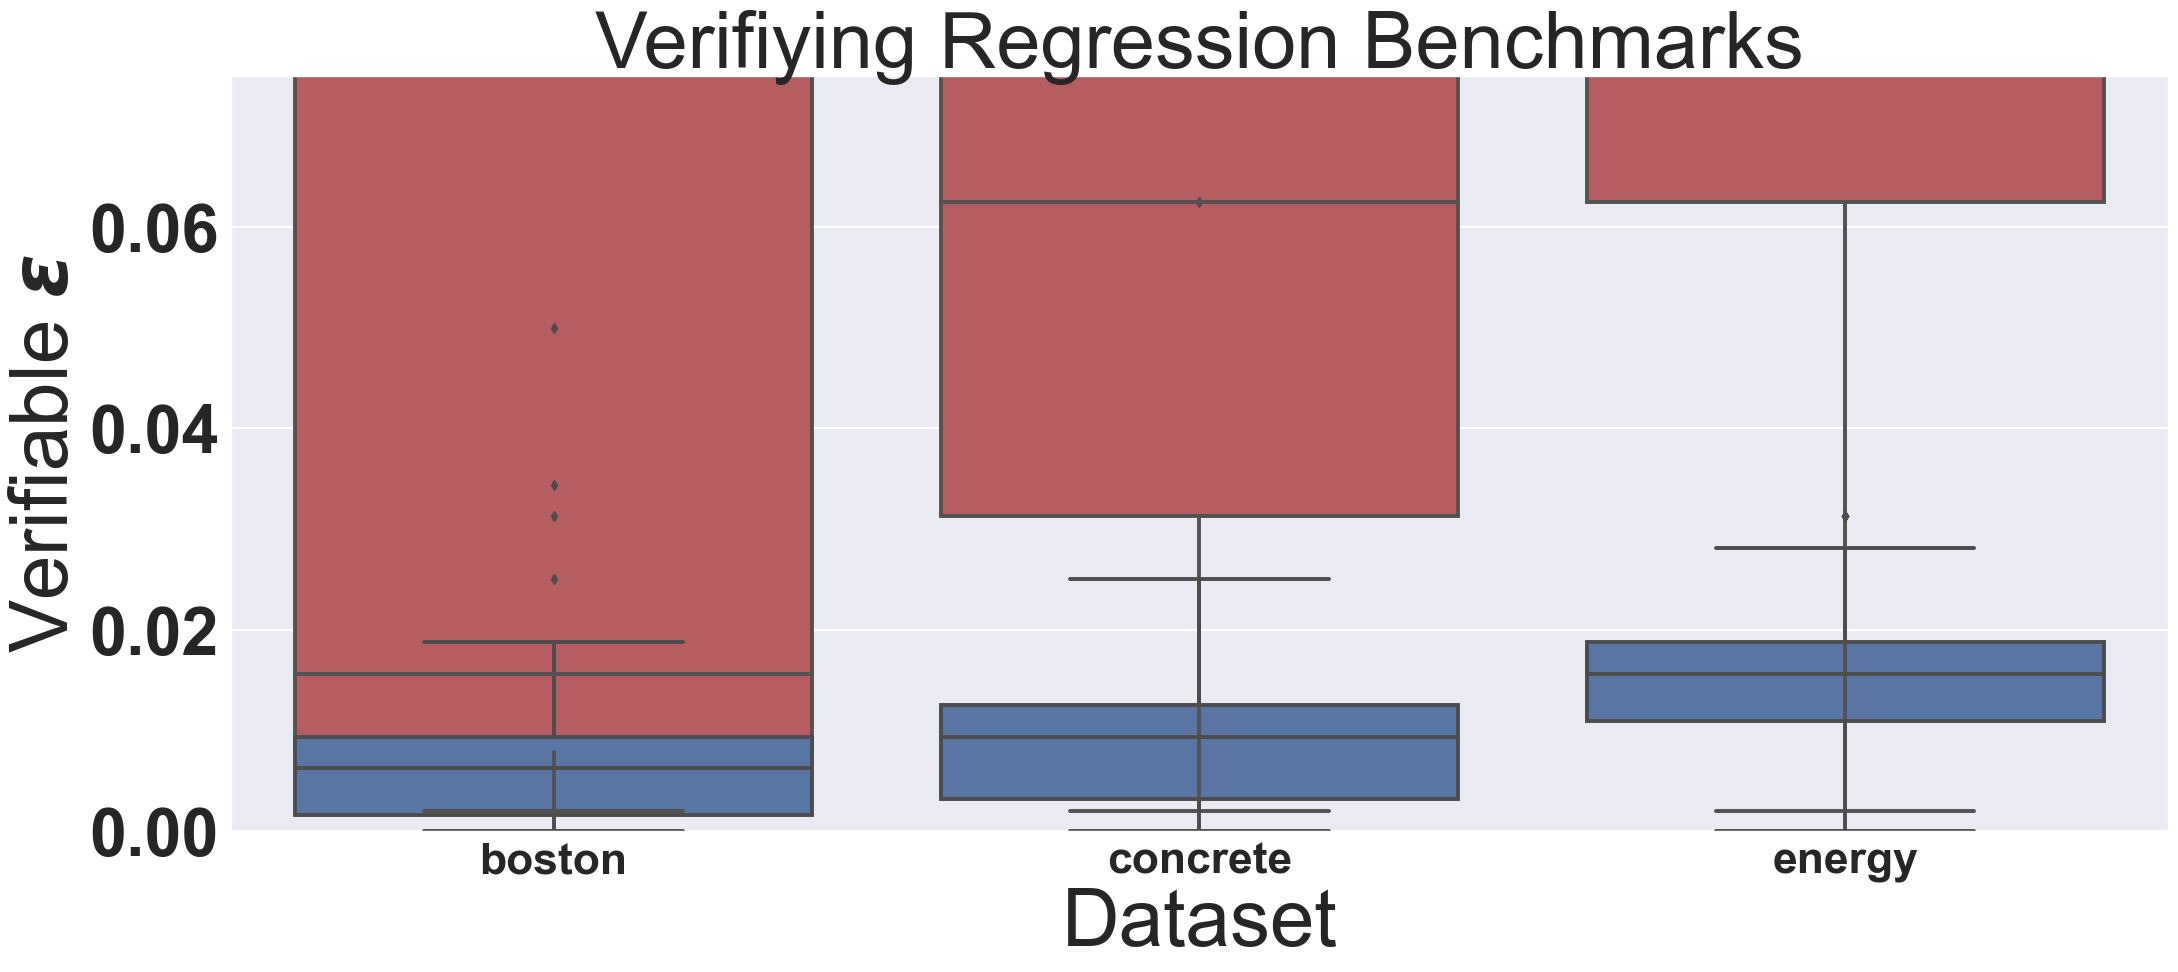

In [4]:
import pandas as pd
data = pd.DataFrame({'label':label, 'eps':e, 'ps':p})
figure(num=None, figsize=(25, 10), dpi=100)
ax = sns.boxplot(x="label", y="eps", data=dataupper, color='r')
ax = sns.boxplot(x="label", y="eps", data=datalower, color='b')
plt.ylabel(r'Verifiable $\epsilon$')
plt.xlabel('Dataset')
plt.ylim([0.0, 0.075])
plt.title('Verifiying Regression Benchmarks')

Text(0.5, 1.0, 'Verifiying Regression Benchmarks')

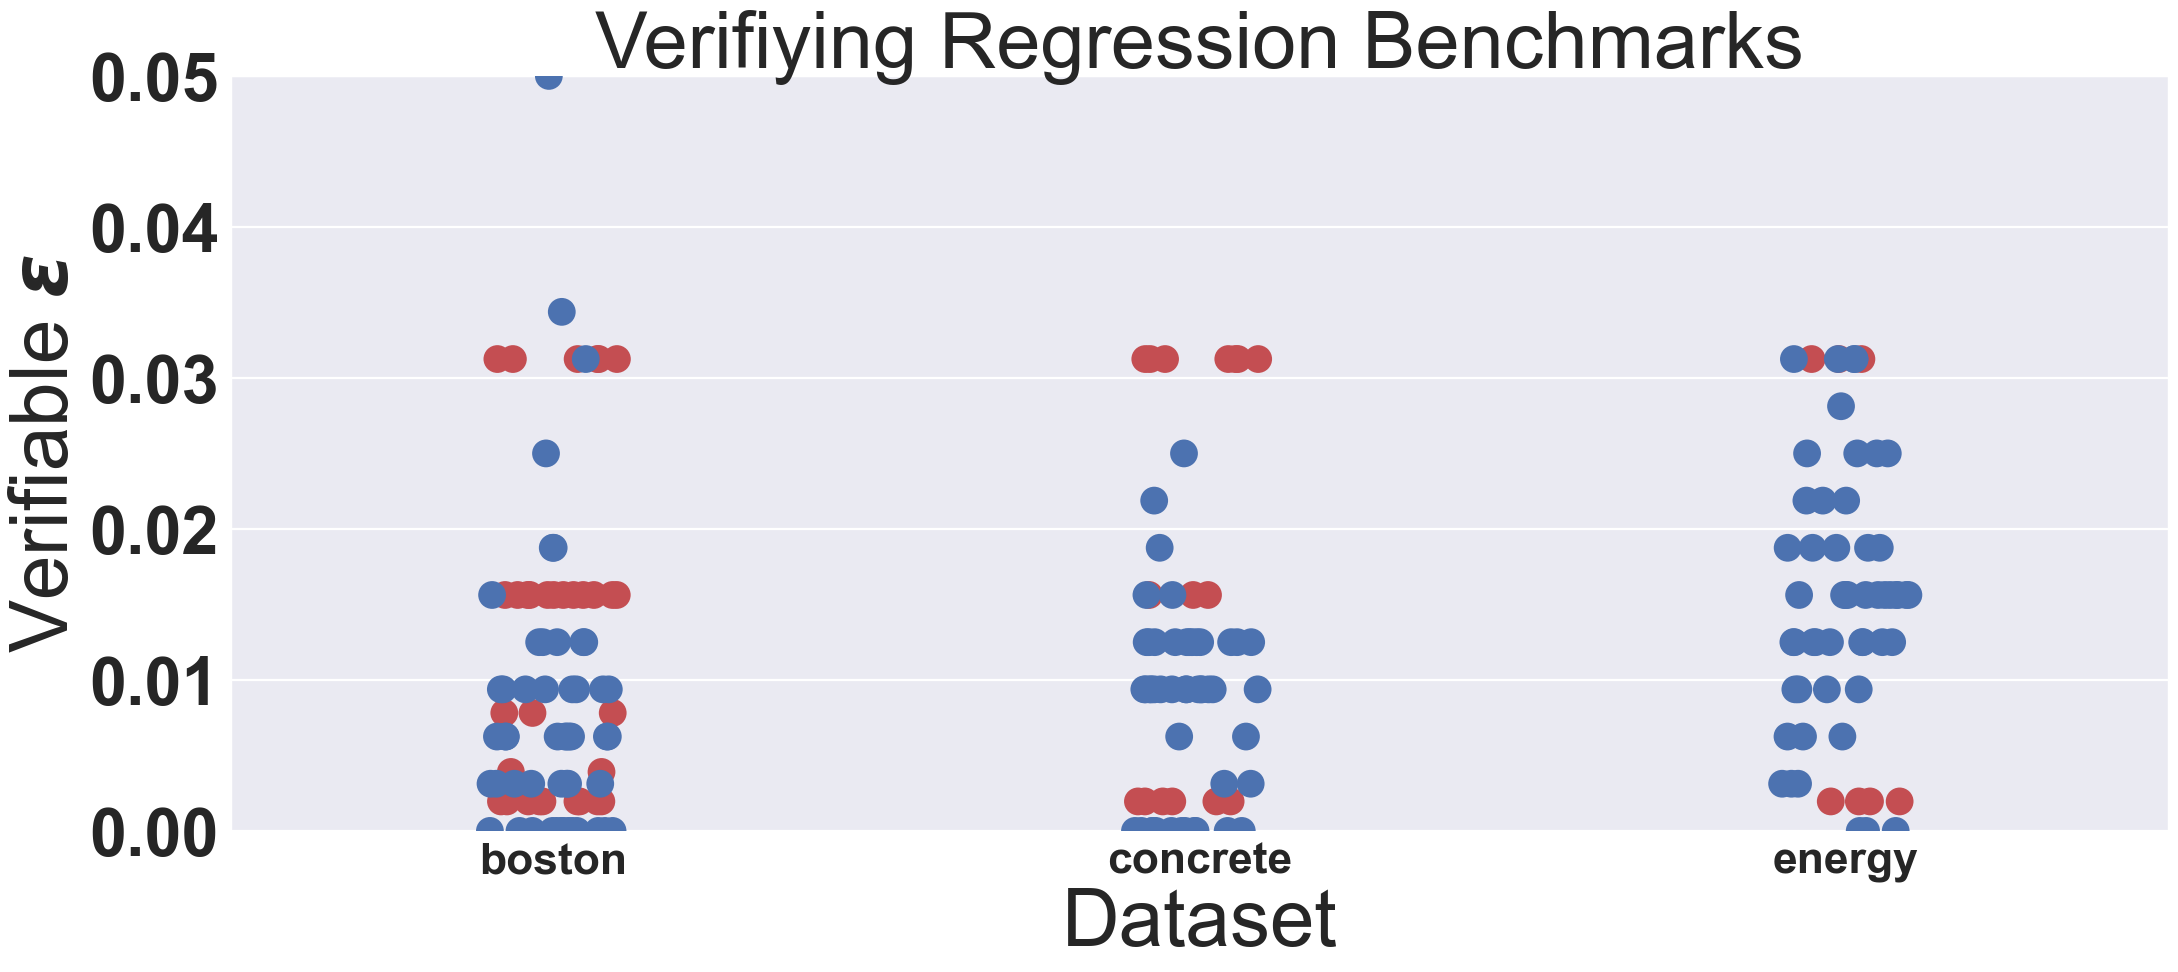

In [5]:
import pandas as pd
data = pd.DataFrame({'label':label, 'eps':e, 'ps':p})
figure(num=None, figsize=(25, 10), dpi=100)
ax = sns.stripplot(x="label", y="eps", data=dataupper, color='r', s=20)
ax = sns.stripplot(x="label", y="eps", data=datalower, color='b', s=20)
plt.ylabel(r'Verifiable $\epsilon$')
plt.xlabel('Dataset')
plt.ylim([0.0, 0.05])
plt.title('Verifiying Regression Benchmarks')

Text(0.5, 1.0, 'Verifiying Regression Benchmarks')

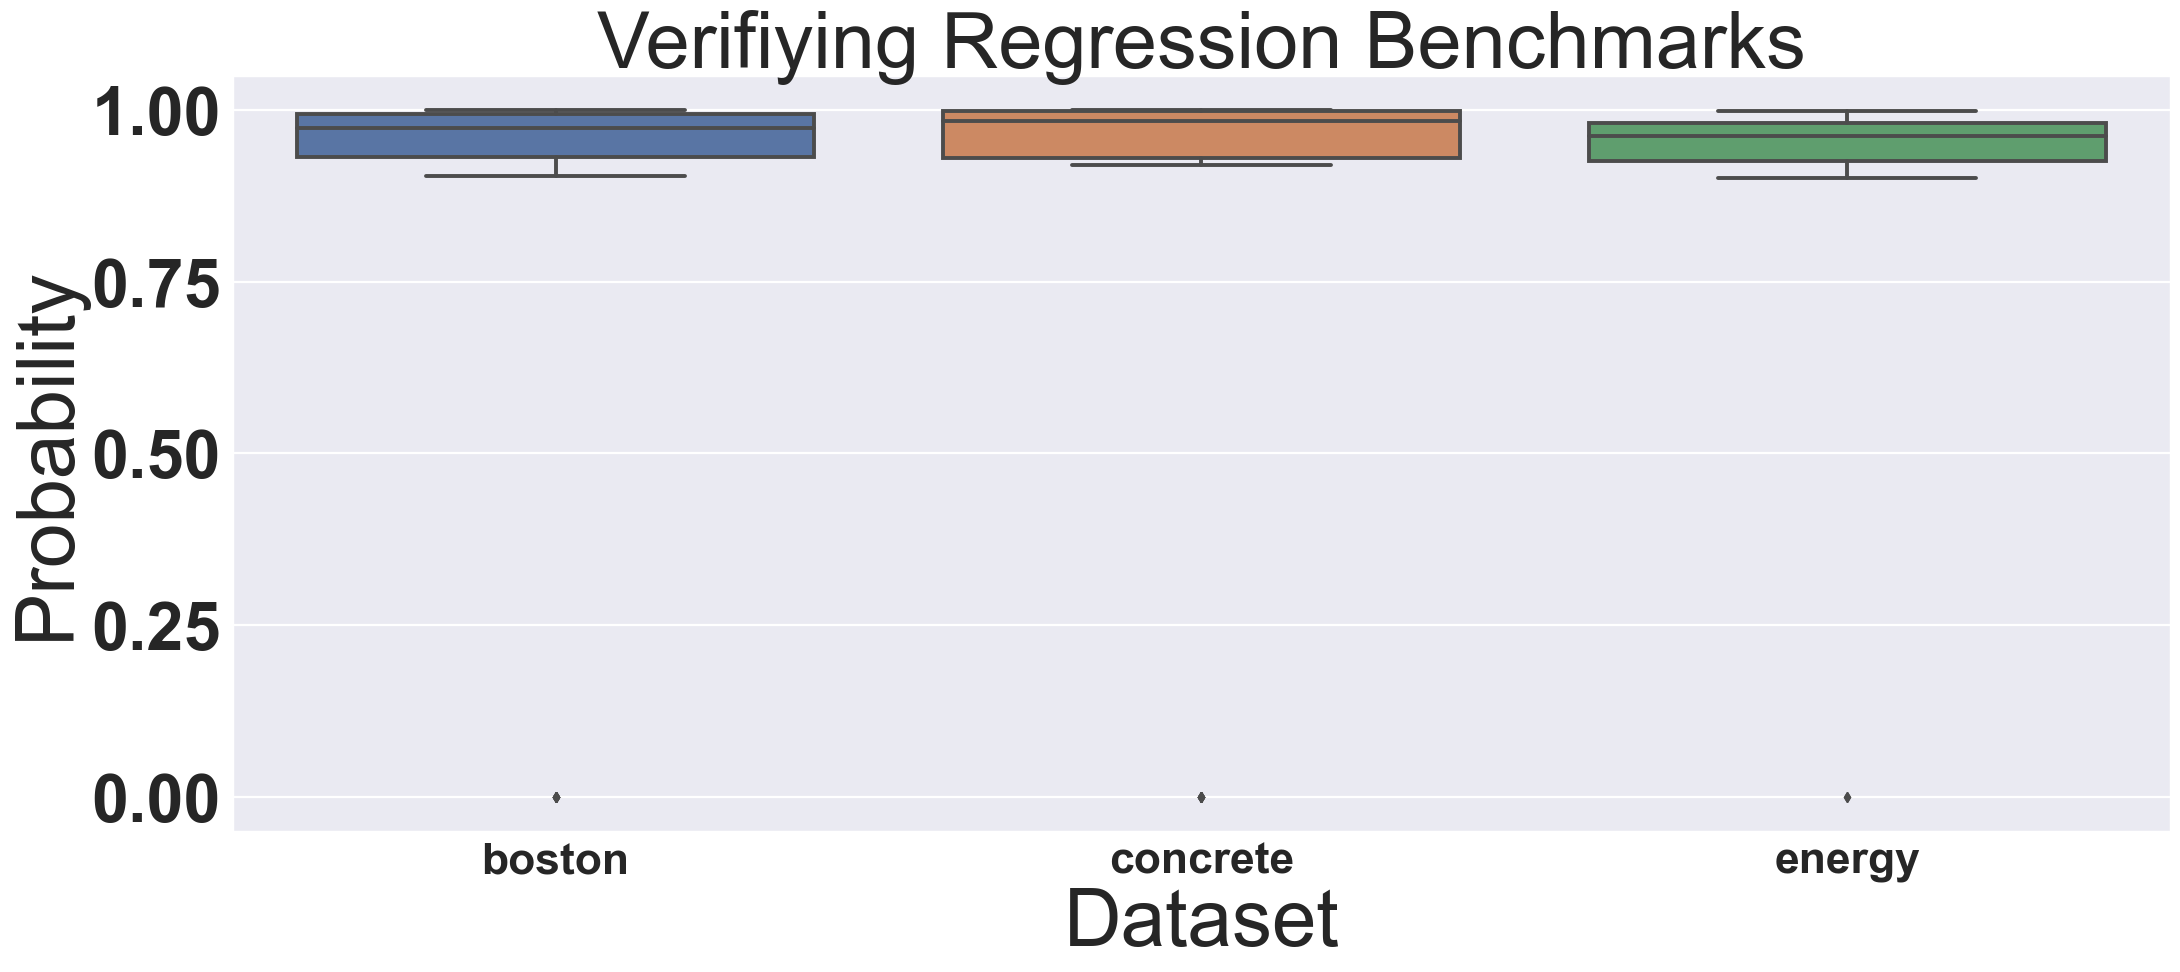

In [6]:
figure(num=None, figsize=(25, 10), dpi=100)
ax = sns.boxplot(x="label", y="ps", data=data)
plt.ylabel(r'Probability')
plt.xlabel('Dataset')
plt.title('Verifiying Regression Benchmarks')

[-1.6796875e-02  8.8437500e-01 -3.4375000e-02  6.2500000e-03
  2.1875000e-02 -1.0546875e-02  2.1875000e-01  2.4375000e-01
 -2.6562500e-02  3.1250000e-03  3.1250000e-02  2.5000000e-01
  2.5000000e-01  2.8125000e-02 -2.3046875e-02  5.3125000e-01
 -1.0546875e-02  5.3125000e-02  2.5000000e-01  1.2500000e-02
  7.8125000e-04 -1.1718750e-03 -1.0546875e-02  5.0937500e-01
 -1.5625000e-03  3.1250000e-02  1.2500000e-02  9.3750000e-03
  1.0625000e-01 -5.4687500e-03  3.1250000e-02  5.6250000e-02
  6.2500000e-01  1.1250000e-01  6.2500000e-01  6.2500000e-03
  1.2500000e-02  9.3750000e-03 -7.4218750e-03  2.5000000e-02
 -1.3671875e-02  2.5000000e-01  1.2500000e-02  2.5000000e-01
 -1.5625000e-03  9.3750000e-03  9.3750000e-03  5.2500000e-01
  1.2500000e-01  2.5000000e-01 -1.1718750e-03]
0.12203584558823528
-0.034375
0.884375


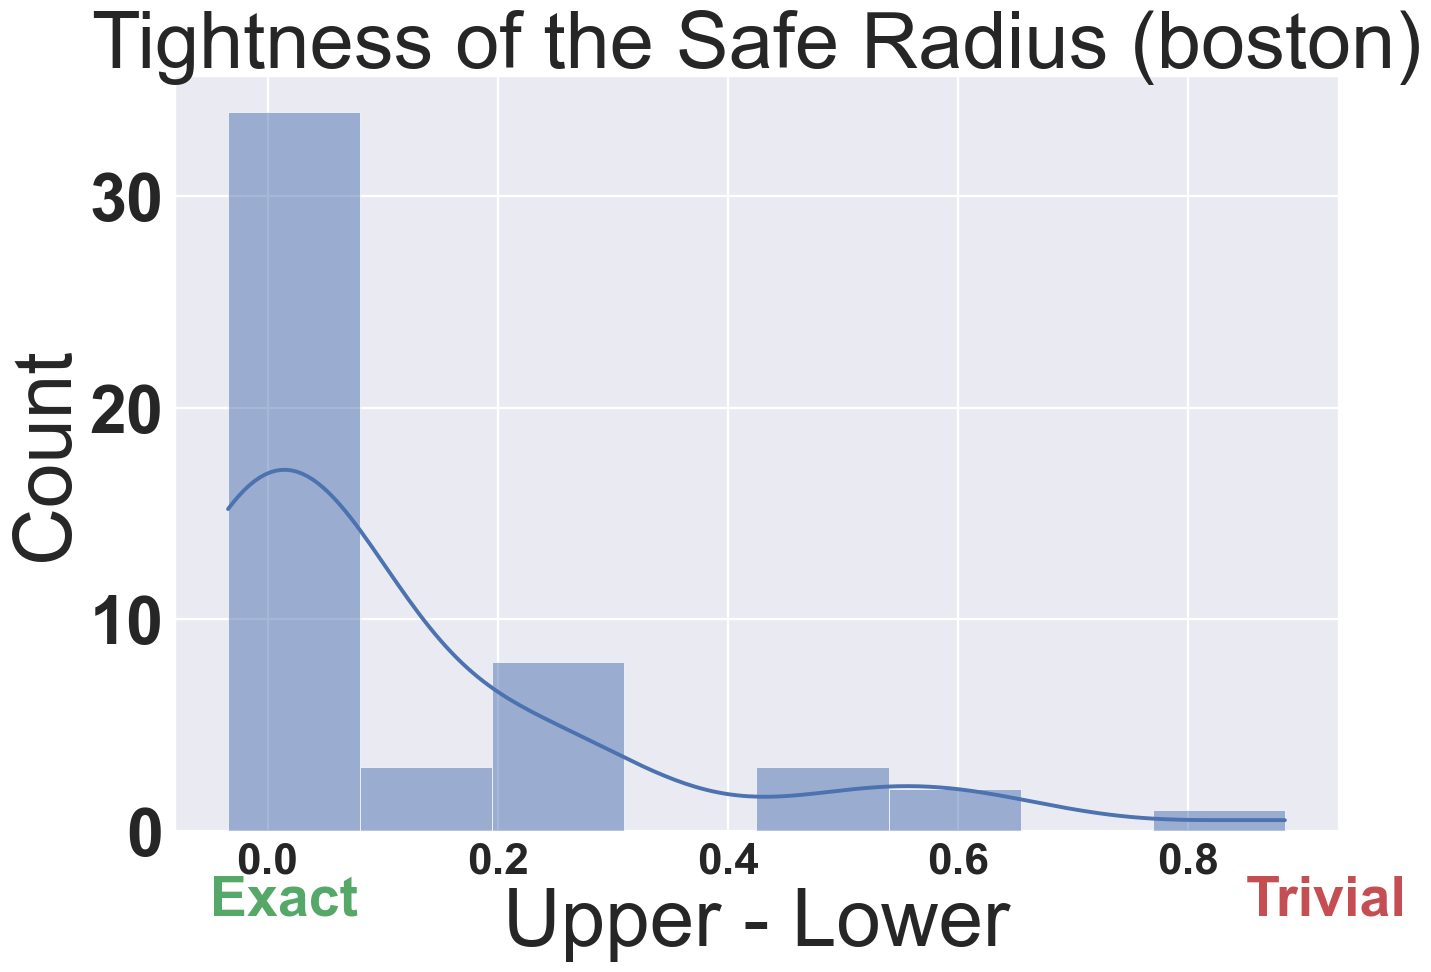

In [21]:
dataset = 'boston'
u_eps, u_ps, u_inds = load_bound_log('MURLogs/%s1_upper_eps.log'%(dataset))
l_eps, l_ps, l_inds = load_bound_log('MSELogs/%s1_eps.log'%(dataset))

uppers = [0.0 for i in range(len(u_inds))]
lowers = [0.0 for i in range(len(l_inds))]

for i in range(len(u_inds)):
    uppers[u_inds[i]] = u_eps[i]
    
for i in range(len(u_inds)):
    lowers[u_inds[i]] = l_eps[i] 

uppers = np.asarray(uppers)
lowers = np.asarray(lowers)

gap = uppers - lowers

print(gap)
print(np.mean(gap))
print(np.min(gap))
print(np.max(gap))
figure(num=None, figsize=(15, 10), dpi=100)
#sns.displot(data=ordered_df, x="gap")
#sns.kdeplot(data=ordered_df, x="gap", shade=True, palette="crest")
sns.histplot(x=gap, kde=True)
plt.xlabel('Upper - Lower')
below = -4
plt.text(-0.05, below, "Exact", color='g', size=40)
plt.text(0.85, below, "Trivial", color='r', size=40)
plt.title('Tightness of the Safe Radius (%s)'%(dataset))
plt.show()